# Introduction to PyTorch

This notebook is referenced from the first video in the [PyTorch Beginner Series](https://www.youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN) by Brad Heintz on YouTube. The video focuses on the basic concepts in PyTorch that are used to handle several deep learning tasks and demonstrates how these concepts come together to make PyTorch a robust machine learning framework. You can find the notebook associated with the video [here](https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html).


In [1]:
# Import PyTorch
import torch

# Check the installed PyTorch version
print(f'PyTorch version installed: {torch.__version__}')

PyTorch version installed: 2.3.1


In [2]:
def check_available_devices() -> None:
    """Prints the available computing devices (CPU and CUDA GPUs) on the system."""
    # Check if CUDA GPUs are available
    cuda_available = torch.cuda.is_available()
    print(f'CUDA GPUs available: {cuda_available}')

    # If CUDA is available, list all the available CUDA devices
    if cuda_available:
        num_devices = torch.cuda.device_count()
        print(f'Number of CUDA devices: {num_devices}')
        
        for device_id in range(num_devices):
            device_name = torch.cuda.get_device_name(device_id)
            print(f' - Device {device_id}: {device_name}')

    # List the CPU
    cpu_device = torch.device('cpu')
    print(f'CPU device: {cpu_device}')

In [3]:
# Check for all available devices
check_available_devices()

CUDA GPUs available: True
Number of CUDA devices: 1
 - Device 0: NVIDIA GeForce RTX 3050 Laptop GPU
CPU device: cpu


## Working with Tensors

Tensors are essentially n-dimensional arrays that serve as the primary units of computations in deep neural networks.


In [4]:
from torch import Tensor

def print_tensor_metadata(tensor: Tensor) -> None:
    """
    Prints the metadata (e.g., dtype, shape, etc.) of the input tensor.

    Args:
        tensor (Tensor): The input PyTorch tensor.
    """
    print(f'The input tensor is:\n{tensor}\n')
    print(f'The dtype of the tensor is               : {tensor.dtype}')
    print(f'The shape of the tensor is               : {tensor.shape}')
    print(f'The device on which the tensor is stored : {tensor.device}')
    print(f'The tensor requires gradient computation : {tensor.requires_grad}')

In [5]:
# Create a tensor with zero values
z = torch.zeros(5, 3)
print_tensor_metadata(z)

The input tensor is:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

The dtype of the tensor is               : torch.float32
The shape of the tensor is               : torch.Size([5, 3])
The device on which the tensor is stored : cpu
The tensor requires gradient computation : False


In [6]:
# Create a tensor of ones as integers
i = torch.ones((5, 3), dtype=torch.int16)
print_tensor_metadata(i)

The input tensor is:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)

The dtype of the tensor is               : torch.int16
The shape of the tensor is               : torch.Size([5, 3])
The device on which the tensor is stored : cpu
The tensor requires gradient computation : False


In [7]:
from typing import Optional, Sequence, Union
from torch import SymInt, Tensor
from torch.types import _bool, _dtype, _int, _layout, Device

def create_random_tensor(
    size: Sequence[Union[_int, SymInt]],
    *,
    out: Optional[Tensor] = None,
    dtype: Optional[_dtype] = None,
    layout: Optional[_layout] = None,
    device: Optional[Device] = None,
    pin_memory: Optional[_bool] = False,
    requires_grad: Optional[_bool] = False,
    seed: Optional[int] = None,
) -> Tensor:
    """
    Returns a tensor filled with random values with the shape defined by
    the variable argument `size`.

    Args:
        size (Sequence[Union[_int, SymInt]]):
            Shape of the output tensor.
        out (Optional[Tensor], optional):
            Output tensor. Defaults to None.
        dtype (Optional[_dtype], optional):
            Desired data type of the returned tensor.
            Defaults to None.
        layout (Optional[_layout], optional):
            Desired layout of the returned tensor.
            Defaults to None.
        device (Optional[Device], optional):
            Desired device of the returned tensor.
            Defaults to None.
        pin_memory (Optional[_bool], optional):
            If set, returned tensor would be allocated in pinned memory.
            Defaults to False.
        requires_grad (Optional[_bool], optional):
            If autograd should record operations on the returned tensor.
            Defaults to False.
        seed (Optional[int], optional):
            Seed for the random number generator.
            Defaults to None.

    Returns:
        Tensor: A tensor filled with random values.
    """
    # Set the random seed
    if seed is not None:
        torch.manual_seed(seed)

    # Generate the random tensor
    rand_tensor = torch.rand(
        size,
        out=out,
        dtype=dtype,
        layout=layout,
        device=device,
        pin_memory=pin_memory,
        requires_grad=requires_grad,
    )

    return rand_tensor

In [8]:
# Create a random tensor with seed=1729
print('Random tensor with random seed:')
print(create_random_tensor(size=(2, 2), seed=1729))

# Create a random tensor without the seed
print('\nRandom tensor without a seed:')
print(create_random_tensor(size=(2, 2)))

# Create a random tensor by reseeding the function
print('\nRandom tensor after reseeding:')
print(create_random_tensor(size=(2, 2), seed=1729))

Random tensor with random seed:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

Random tensor without a seed:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Random tensor after reseeding:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [9]:
# Perform element-wise arithmetic operations
ones = torch.ones(2, 3)
twos = torch.ones(2, 3) * 2
threes = ones + twos
print(f'{ones}\n\t+\n{twos}\n\t=\n{threes}')

tensor([[1., 1., 1.],
        [1., 1., 1.]])
	+
tensor([[2., 2., 2.],
        [2., 2., 2.]])
	=
tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [10]:
# Using in-built mathematical tensor operations
r = (torch.rand(2, 2) - 0.5) * 2
print(f'The random matrix, r:\n{r}')
print(f'\nAbsolute value of r:\n{torch.abs(r)}')
print(f'\nInverse sine of r:\n{torch.asin(r)}')
print(f'\nDeterminant of r:\n{torch.det(r)}')
print(f'\nSingular value decomposition of r:\n{torch.svd(r)}')
print(f'\nStandard deviation and average of r:\n{torch.std_mean(r)}')
print(f'\nMaximum value of r:\n{torch.max(r)}')

The random matrix, r:
tensor([[-0.1568, -0.8619],
        [-0.5336, -0.1907]])

Absolute value of r:
tensor([[0.1568, 0.8619],
        [0.5336, 0.1907]])

Inverse sine of r:
tensor([[-0.1574, -1.0390],
        [-0.5628, -0.1919]])

Determinant of r:
-0.4299735724925995

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.9135, -0.4069],
        [-0.4069,  0.9135]]),
S=tensor([0.9370, 0.4589]),
V=tensor([[ 0.3846, -0.9231],
        [ 0.9231,  0.3846]]))

Standard deviation and average of r:
(tensor(0.3312), tensor(-0.4357))

Maximum value of r:
-0.15679681301116943


## Understanding Autograd

Autograd provides an automatic differentiation engine for all operations on tensors.

Some important concepts related to Autograd are as follows:

- _Automatic differentiation_ involves automating the computation of gradients of tensor operations.
- PyTorch builds a dynamic _computational graph_ when performing operations on tensors.
- The generated computational graph is _dynamic_ in nature which allows for more flexibility.


In [11]:
# Build a simple RNN model
x = torch.rand(
    1, 10, requires_grad=True,
)                                   # Input tensor
prev_h = torch.rand(
    1, 20, requires_grad=True,
)                                   # Previous hidden state
W_x = torch.rand(20, 10)            # Weights for the input layer
W_h = torch.rand(20, 20)            # Weights for the hidden layer
print(f'The input tensor:\n{x}\n')
print(f'The previous hidden state:\n{prev_h}\n')

# Print the shapes
print(f'Shape of the input tensor                 : {x.shape}')
print(f'Shape of the previous hidden state        : {prev_h.shape}')

# Matrix multiplication of weights
# with their respective tensors
i2h = torch.mm(W_x, x.t())          # Transform input to hidden state contribution
h2h = torch.mm(W_h, prev_h.t())     # Transform previous to new hidden state contibution
print(f'Shape of the output of i2h transformation : {i2h.shape}')
print(f'Shape of the output of h2h transformation : {h2h.shape}')

# Accumulate the outputs and
# apply an activation function
next_h = i2h + h2h                  # Combine input and hidden state contributions
next_h = next_h.tanh()              # Apply tanh activation function
print(f'Shape of the activated next hidden state  : {next_h.shape}\n')

# Compute the loss and allow the
# computation of gradients wrt
# the input tensors
loss = next_h.sum()                 # Compute loss as sum of all elements in next_h
loss.backward()                     # Perform backpropagation to compute gradients
print(f'The computed loss is: {loss}\n')

# Print the gradients
print(f'Gradient of the input tensor:\n{x.grad}\n')
print(f'Gradient of the previous hidden state:\n{prev_h.grad}')

# These gradients then can be used
# to optimize the weights such that
# the loss is minimized

The input tensor:
tensor([[0.2162, 0.9927, 0.4128, 0.5938, 0.6128, 0.1519, 0.0453, 0.5035, 0.9978,
         0.3884]], requires_grad=True)

The previous hidden state:
tensor([[0.6929, 0.1703, 0.1384, 0.4759, 0.7481, 0.0361, 0.5062, 0.8469, 0.2588,
         0.2707, 0.4115, 0.6839, 0.0703, 0.5105, 0.9451, 0.2359, 0.1979, 0.3327,
         0.6146, 0.5999]], requires_grad=True)

Shape of the input tensor                 : torch.Size([1, 10])
Shape of the previous hidden state        : torch.Size([1, 20])
Shape of the output of i2h transformation : torch.Size([20, 1])
Shape of the output of h2h transformation : torch.Size([20, 1])
Shape of the activated next hidden state  : torch.Size([20, 1])

The computed loss is: 19.999900817871094

Gradient of the input tensor:
tensor([[1.2354e-04, 4.3917e-05, 9.7379e-05, 1.4471e-04, 1.0433e-04, 9.2043e-05,
         8.5061e-05, 1.0279e-04, 7.5951e-05, 9.8666e-05]])

Gradient of the previous hidden state:
tensor([[1.0014e-04, 7.4527e-05, 9.4934e-05, 9.4383

The computation graph built for this model at run time can be seen [here](https://youtu.be/IC0_FRiX-sw?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN&t=588).


## Building Models in PyTorch

All models in PyTorch are built by subclassing the `torch.nn.Module` class.

The architecture for the LeNet-5 CNN model:

![LeNet-5 architecture](https://miro.medium.com/v2/resize:fit:2000/1*1TI1aGBZ4dybR6__DI9dzA.png)

- **Input Layer:** Takes a 32x32 grayscale image of digits from the MNIST dataset.
- **First Convolutional Layer (C1):** Applies 6 convolutional filters of size 5x5 to the input image, resulting in six 28x28 feature (activation) maps.
- **First Subsampling Layer (S2):** Applies average pooling with a 2x2 filter and a stride of 2 to the six 28x28 feature maps, resulting in six 14x14 feature maps.
- **Second Convolutional Layer (C3):** Applies 16 convolutional filters of size 5x5 to the 14x14 feature maps, resulting in sixteen 10x10 feature maps.
- **Second Subsampling Layer (S4):** Applies average pooling with a 2x2 filter and a stride of 2 to the sixteen 10x10 feature maps, resulting in sixteen 5x5 feature maps.
- **First Fully-Connected Layer (C5):** Flattens the sixteen 5x5 feature maps, resulting in 120 1x1 feature maps (i.e., a 120-dimensional vector).
- **Second Fully-Connected Layer (F6):** A fully-connected layer with 84 units (neurons), where each unit is connected to the 120-dimensional vector.
- **Output Layer:** A fully-connected layer with 10 units, where each unit corresponds to one of the 10 digit classes (0-9). This layer outputs the prediction probabilities using a softmax activation function.


In [12]:
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

class LeNet(nn.Module):
    """Convolutional neural network (CNN) referenced from the LeNet-5 architecture."""
    
    def __init__(self) -> None:
        # Instantiate the parent class
        super(LeNet, self).__init__()

        # First convolutional layer (C1):
        # - 1 input channel (black & white)
        # - 6 output channels
        # - 5x5 convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)

        # First subsampling layer (S2):
        # - 2x2 kernel size
        # - 2 stride
        self.pool1 = nn.AvgPool2d(2, stride=2)

        # Second convolutional layer (C3):
        # - 6 input channels
        # - 16 output channels
        # - 5x5 convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Second subsampling layer (S4)
        # - 2x2 kernel size
        # - 2 stride
        self.pool2 = nn.AvgPool2d(2, stride=2)

        # First fully-connected layer (C5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        # Second fully-connected layer (F6)
        self.fc2 = nn.Linear(120, 84)

        # Output layer
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: Tensor) -> Tensor:
        """
        Defines the forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (N, 1, 32, 32) where N is the batch size.

        Returns:
            Tensor: Output tensor of shape (N, 10) representing the class scores.
        """
        # Apply max pooling over a (2, 2) window to
        # the ReLU activated convolutional layers
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))

        # Flatten the pooled outputs
        x = x.view(-1, self.num_flat_features(x))

        # Handle the fully-connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Apply softmax activation function
        # to get probabilities
        x = F.softmax(self.fc3(x), dim=1)

        return x

    def num_flat_features(self, x: Tensor) -> int:
        """
        Computes the total number of features in the input tensor excluding the batch dimension.

        Args:
            x (Tensor): Input tensor.

        Returns:
            int: Number of features in the input tensor.
        """
        # Get the size of the input tensor
        # (except the batch dimension)
        size = x.size()[1:]

        # Compute number of features
        num_features = 1
        for s in size:
            num_features *= s

        return num_features

In [13]:
# Instantiate the neural network
net = LeNet()
print(net)

# Generate a dummy image data
input = torch.rand(1, 1, 32, 32)
print(f'\nImage batch shape:\n{input.shape}')

# Feed the input data to the network,
# this calls the forward function
output = net(input)
print(f'\nRaw output:\n{output}\n{output.shape}')

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[0.1011, 0.0979, 0.1099, 0.1105, 0.0926, 0.1028, 0.0957, 0.0958, 0.0998,
         0.0940]], grad_fn=<SoftmaxBackward0>)
torch.Size([1, 10])


## Datasets and DataLoaders

Preparing and preprocessing datasets and creating data loaders to efficiently access data in batches for training and evaluation.

The CIFAR10 dataset is a set of 32x32 color images representing 10 classes of objects:

- animals (6) - bird, cat, deer, dog, frog, horse
- vehicles (4) - airplane, automobile, ship, truck


In [14]:
import torch
import torchvision
import torchvision.transforms as transforms

# Setup a transformer to manipulate the image
# data and convert it to a PyTorch tensor
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            mean=(0.5, 0.5, 0.5),   # Mean of each channel
            std=(0.5, 0.5, 0.5),    # Std of each channel
        ),
    ]
)

# Load the CIFAR10 dataset
train_ds = torchvision.datasets.CIFAR10(
    root='../data', train=True, download=True, transform=transform,
)
train_ds

100%|██████████| 170498071/170498071 [02:36<00:00, 1091942.33it/s] 


Extracting ../data/cifar-10-python.tar.gz to ../data


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [15]:
# Setup a data loader
train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=4, shuffle=True, num_workers=2,
)
train_loader

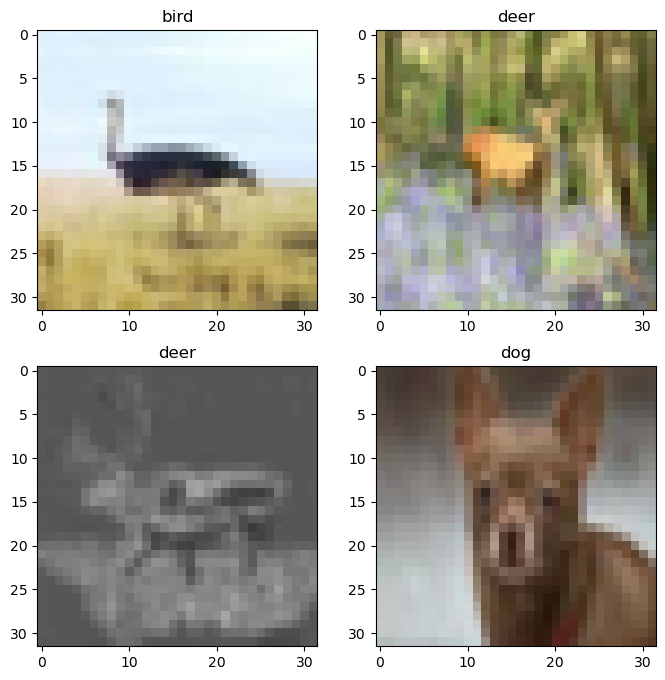

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Set the image classes
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

def plot_image(img: Tensor) -> None:
    """
    Plots the image tensor from the CIFAR10 dataset.

    Args:
        img (Tensor): The image tensor.
    """
    # Remove normalisation
    img = img / 2.0 + 0.5
    # Plot the image
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

# Get random training images
data_iter = iter(train_loader)
images, labels = next(data_iter)

def batch_plot(images: list[Tensor], labels: list[int]):
    """
    Plots the batch of images with their respective titles.

    Args:
        images (list[Tensor]): The batch of images.
        labels (list[int]): The batch of respective labels.
    """
    plt.figure(figsize=(8, 8))
    for idx, (image, label) in enumerate(zip(images, labels)):
        plt.subplot(2, 2, idx + 1)
        plot_image(image)
        plt.title(classes[label])
    plt.show()

# Visualize the batch of images
batch_plot(images, labels)

## Training the PyTorch Model

The steps involved (here) in training a PyTorch model are as follows:

- Get the training dataset from repositories.
- Prepare a transformer to preprocess the dataset.
- Load the training dataset into batches.
- Visualize the training batch.
- Build the required neural network model.
- Setup a loss function and an optimizer.
- Train the model for a specified number of epochs.


In [17]:
# Import libraries here
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [18]:
# Setup the transformer
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((.5, .5, .5), (.5, .5, .5)),
    ]
)

# Load the training set
train_set = torchvision.datasets.CIFAR10(
    root='../data', train=True, download=True, transform=transform,
)
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=4, shuffle=True, num_workers=2,
)

# Load the testing set
test_set = torchvision.datasets.CIFAR10(
    root='../data', train=False, download=True, transform=transform,
)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=4, shuffle=False, num_workers=2,
)

# Setup the classes
classes

Files already downloaded and verified
Files already downloaded and verified


('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

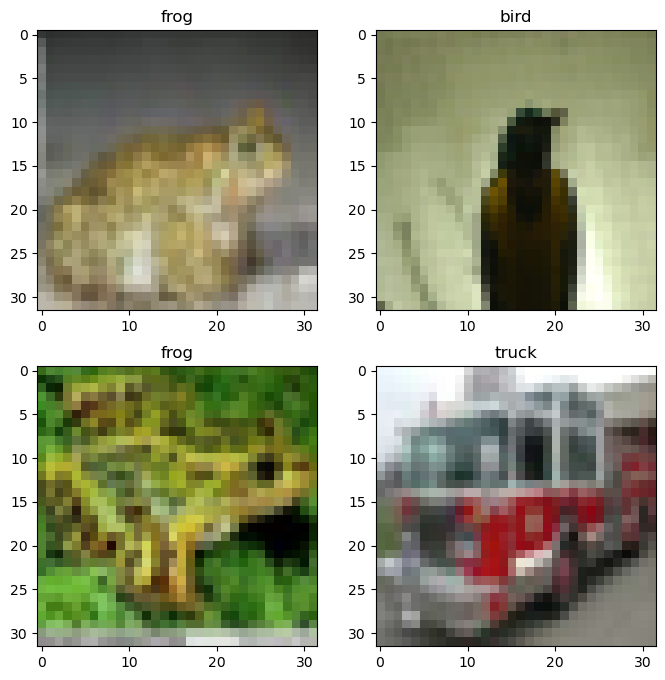

In [19]:
# Plot a random set of training images
data_iter = iter(train_loader)
images, labels = next(data_iter)
batch_plot(images, labels)

In [20]:
# Build a neural network

class Net(nn.Module):
    """Convolutional neural network (CNN) to classify images from the CIFAR10 dataset."""
    
    def __init__(self) -> None:
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)     # adjusted for 3 channels
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: Tensor) -> Tensor:
        """
        Defines the forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (N, 1, 32, 32) where N is the batch size.

        Returns:
            Tensor: Output tensor of shape (N, 10) representing the class scores.
        """
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [21]:
# Initialize the model
net = Net()
print(f'The selected neural network: {net}\n')

# Setup a loss function
criterion = nn.CrossEntropyLoss()
print(f'The loss function is: {criterion}\n')

# Setup an optimizer
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)
print(f'The optimizer is: {optimizer}')

The selected neural network: Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

The loss function is: CrossEntropyLoss()

The optimizer is: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [22]:
# Setup the constants
N_EPOCHS = 3

def train_neural_net(net: Net, epochs: int = N_EPOCHS) -> None:
    """
    Trains the neural network for the specified epochs.

    Args:
        net (Net): The neural network to train.
        epochs (int, optional): The number of epochs to train for. Defaults to N_EPOCHS.
    """
    for epoch in range(epochs):
        
        # Initialize the running loss
        running_loss = 0.0

        for i, data in enumerate(train_loader, start=0):
            # Get the inputs
            inputs, labels = data

            # Set the parameters gradient to zero
            optimizer.zero_grad()

            # Perform the 3-step training
            outputs = net(inputs)               # Forward pass
            loss = criterion(outputs, labels)   # Calculate training loss
            loss.backward()                     # Backward pass
            optimizer.step()                    # Optimization

            # Print statistics at every 2000 mini-batches
            running_loss += loss.item()
            if i % 2000 == 1999:
                print(f'({epoch + 1}, {i + 1:5d}) loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print(f'\nTraining finished after {N_EPOCHS} epochs!')

In [23]:
# Train the model - optimize the model to find the best weights
train_neural_net(net, epochs=N_EPOCHS)

(1,  2000) loss: 2.200
(1,  4000) loss: 1.842
(1,  6000) loss: 1.661
(1,  8000) loss: 1.584
(1, 10000) loss: 1.510
(1, 12000) loss: 1.460
(2,  2000) loss: 1.402
(2,  4000) loss: 1.373
(2,  6000) loss: 1.348
(2,  8000) loss: 1.332
(2, 10000) loss: 1.277
(2, 12000) loss: 1.279
(3,  2000) loss: 1.210
(3,  4000) loss: 1.194
(3,  6000) loss: 1.191
(3,  8000) loss: 1.185
(3, 10000) loss: 1.182
(3, 12000) loss: 1.160

Training finished after 3 epochs!


In [24]:
# Evaluate the performance of the model
correct = 0
total = 0
with torch.no_grad():   # Turn off gradient calculations
    for data in test_loader:
        images, labels = data

        # Get predictions from the test data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the neural network: {correct / total * 100}%')

Accuracy of the neural network: 58.379999999999995%


In [25]:
# Compile the model to a static representation as TorchScript code
model_script = torch.jit.script(net)

# Save the model script locally for future use
model_script.save('../models/01_lenet5.pt')